In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [1]:
temp_df = pd.read_csv("1839285.csv")
temp_df.head()

,STATION,NAME,DATE,AWND,FMTM,FRGT,PGTM,PRCP,SNOW,SNWD,...,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT16,WT18
0,USW00024234,"SEATTLE BOEING FIELD, WA US",1948-01-01,NaN,NaN,NaN,NaN,0.64,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,USW00024234,"SEATTLE BOEING FIELD, WA US",1948-01-02,NaN,NaN,NaN,NaN,0.33,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,USW00024234,"SEATTLE BOEING FIELD, WA US",1948-01-03,NaN,NaN,NaN,NaN,0.33,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,USW00024234,"SEATTLE BOEING FIELD, WA US",1948-01-04,NaN,NaN,NaN,NaN,0.21,0.0,0.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,USW00024234,"SEATTLE BOEING FIELD, WA US",1948-01-05,NaN,NaN,NaN,NaN,0.25,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN


In [2]:
temp_df["DATE"] = pd.to_datetime(temp_df["DATE"])

In [3]:
air_temp = ["STATION", "NAME", "DATE", "TAVG", "TMAX", "TMIN"]
temp_df = temp_df[air_temp]

In [4]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14029 entries, 0 to 14028
Data columns (total 6 columns):
STATION    14029 non-null object
NAME       14029 non-null object
DATE       14029 non-null datetime64[ns]
TAVG       2429 non-null float64
TMAX       14005 non-null float64
TMIN       14004 non-null float64
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 657.7+ KB


In [5]:
temp_df.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00024234,"SEATTLE BOEING FIELD, WA US",1948-01-01,NaN,52.0,43.0
1,USW00024234,"SEATTLE BOEING FIELD, WA US",1948-01-02,NaN,46.0,39.0
2,USW00024234,"SEATTLE BOEING FIELD, WA US",1948-01-03,NaN,48.0,37.0
3,USW00024234,"SEATTLE BOEING FIELD, WA US",1948-01-04,NaN,47.0,35.0
4,USW00024234,"SEATTLE BOEING FIELD, WA US",1948-01-05,NaN,48.0,33.0


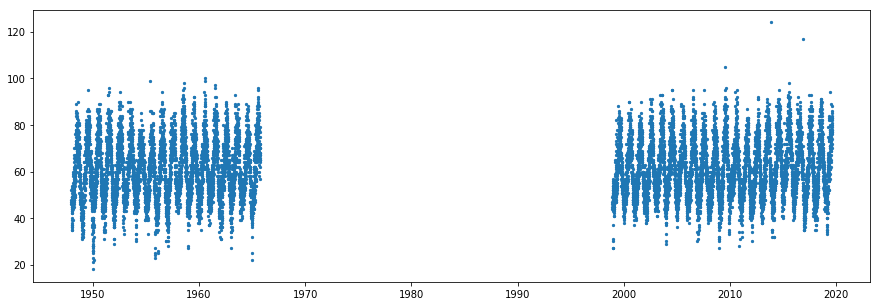

In [25]:
max_temp_df = temp_df[["DATE", "TMAX"]]
max_temp_df = max_temp_df.set_index("DATE")
max_temp_df.index = pd.DatetimeIndex(max_temp_df.index)

fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(max_temp_res_df.index, max_temp_res_df["TMAX"], s=5)

In [22]:
max_temp_df = temp_df[["DATE", "TMAX"]]
max_temp_df = max_temp_df.set_index("DATE")
max_temp_df.index = pd.DatetimeIndex(max_temp_df.index)
max_temp_res_df = max_temp_df.resample('1D').first()

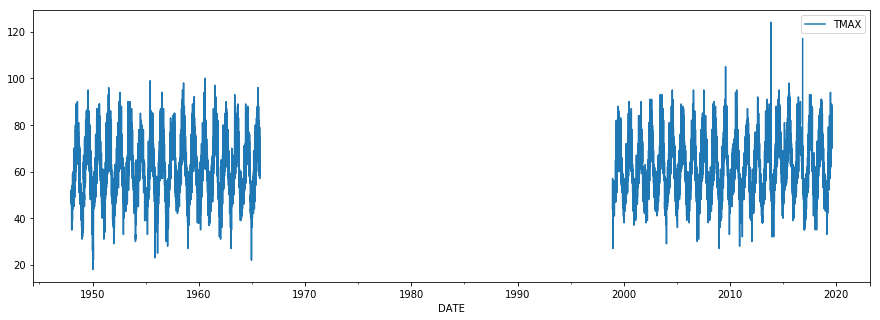

In [24]:
max_temp_res_df.plot(figsize=(15,5));

In [26]:
print(max_temp_df.shape)
print(max_temp_res_df.shape)

(14029, 1)
(26154, 1)


Difference in size between the two is the total missing values between ~1980 and ~1999

In [34]:
max_temp_res_df.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            7, 8, 8, 8, 8, 8, 8, 8, 8, 8],
           dtype='int64', name='DATE', length=26154)

In [37]:
max_temp_res_df['month'] = max_temp_res_df.index.month
max_temp_res_df['year'] = max_temp_res_df.index.year

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A val

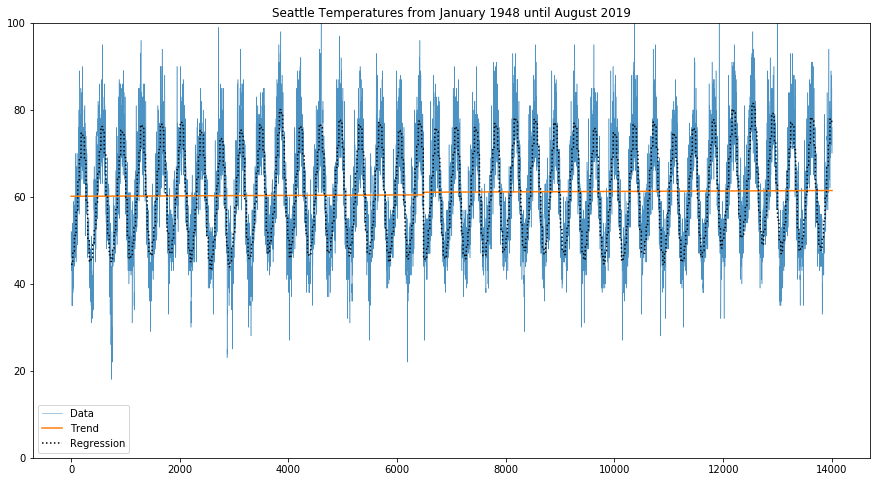

In [67]:
def fit_trend_model(trend_df):
    trend_df = trend_df.dropna()
    trend_df['i'] = np.arange(len(trend_df))
    trend_df['month'] = trend_df.index.month
    trend_df['year'] = trend_df.index.year
    
    trend_model = LinearRegression()
    trend_model.fit(trend_df[['year']], trend_df['TMAX'])
    trend_line = trend_model.predict(trend_df[['year']])

    month_year_encoder = OneHotEncoder(categories='auto')
    month_year_encoder.fit(trend_df[['month', 'year']])
    month_year_data = month_year_encoder.transform(trend_df[['month', 'year']]).toarray()

    lr = LinearRegression()
    data = np.hstack((trend_df[['month', 'year']].values, month_year_data))
    lr.fit(data, trend_df['TMAX'])
    return trend_df, trend_line, lr, data

def get_prediction_for_trend(trend_df):
    trend_df, trend_line, lr, data = fit_trend_model(trend_df)
    lr_pred = lr.predict(data) # Predixctive model based on i and month
    return trend_df, trend_line, lr_pred

def plot_predictions(trend_df):
    trend_df, trend_line, lr_pred = get_prediction_for_trend(trend_df)
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.set_title("Seattle Temperatures from January 1948 until August 2019")
    ax.plot(trend_df['i'], trend_df['TMAX'], label='Data',
       linewidth=.5, alpha=.8)
    ax.plot(trend_df['i'], trend_line, label='Trend')
    ax.plot(trend_df['i'], lr_pred, label='Regression', linestyle="dotted", color='k')
    plt.legend()
    ticks = ax.get_xticks()
    ax.set_ylim((0, 100))
#    ax.set_xticks([tick for tick in ticks if tick%24 == 0])
    plt.show()

plot_predictions(max_temp_res_df)